# Real Cases Python Data Analysis

### Population Analysis – Data Aggregation

In [93]:
import os
#first step
fileNames = []
for root, dirs, files in os.walk(".\\files"):
    for file in files:
        if file.endswith(".xlsx"):
            s = os.path.join(root, file)
            fileNames.append(s)

In [94]:
fileNames[:5]

['.\\files\\AA0-1726.xlsx',
 '.\\files\\AA0-2301.xlsx',
 '.\\files\\AA0-3212.xlsx',
 '.\\files\\AA0-3266.xlsx',
 '.\\files\\AA0-34.xlsx']

In [95]:
len(fileNames)

80

In [96]:
print(pd.ExcelFile(fileNames[0]).sheet_names)

['Tenants', 'Inspection', 'Compliance', 'Audit', 'Social', 'Maintenance']


In [98]:
#second step
sheets = ['Tenants', 'Inspection', 'Compliance', \
          'Audit', 'Social', 'Maintenance']
for sht in sheets: #read by sheet
    all_dfs = []
    for f in fileNames: #read by file
        try:
            all_dfs.append(pd.read_excel(f, sheet_name=sht).\
                           set_index('Date'))
        except:
            pass

In [99]:
len(all_dfs)

80

In [102]:
#second step
sheets = ['Tenants', 'Inspection', 'Compliance', \
          'Audit', 'Social', 'Maintenance']
for sht in sheets:
    all_dfs = []
    for f in fileNames:
        try:
            all_dfs.append(pd.read_excel(f, sheet_name=sht).\
                           set_index('Date'))
        except: 
            pass
#third step
    d = all_dfs[0] #choose the first dataframe as the base
    for a in range(1,len(all_dfs)):
        d = d.groupby('Date').sum().add(all_dfs[a].\
                                        groupby('Date').
                                        sum(), fill_value=0)

In [104]:
#second step
sheets = ['Tenants', 'Inspection', 'Compliance', \
          'Audit', 'Social', 'Maintenance']
with pd.ExcelWriter('All.xlsx') as writer: #use pandas writer 
    for sht in sheets:
        all_dfs = []
        for f in fileNames:
            try:
                all_dfs.append(pd.read_excel(f, sheet_name=sht).\
                               set_index('Date'))
            except: 
                pass
#third step
        d = all_dfs[0] #choose the first dataframe as the base
        for a in range(1,len(all_dfs)):
            d = d.groupby('Date').sum().add(all_dfs[a].\
                                            groupby('Date').
                                            sum(), fill_value=0)

        #Write each sheet in the result file
        d.reset_index().to_excel(writer, sheet_name=sht,\
                                 index=False)

In [105]:
import time
start_time = time.time()

#second step
sheets = ['Tenants', 'Inspection', 'Compliance', \
          'Audit', 'Social', 'Maintenance']
with pd.ExcelWriter('All.xlsx') as writer: #use pandas writer 
    for sht in sheets:
        all_dfs = []
        for f in fileNames:
            try:
                all_dfs.append(pd.read_excel(f, sheet_name=sht)\
                            .set_index('Date'))
            except: 
                pass
#third step
        d = all_dfs[0] #choose the first dataframe as the base
        for a in range(1,len(all_dfs)):
            d = d.groupby('Date').sum().add(all_dfs[a].\
                                            groupby('Date').
                                            sum(), fill_value=0)

        #Write each sheet in the result file
        d.reset_index().to_excel(writer, sheet_name=sht,\
                                 index=False)
        
print("--- %s second ---" % (time.time() - start_time))

--- 15.114997386932373 second ---


In [106]:
#second step
sheets = ['Tenants', 'Inspection', 'Compliance', \
          'Audit', 'Social', 'Maintenance']
with pd.ExcelWriter('All.xlsx') as writer: #use pandas writer 
    for sht in sheets:
        all_dfs = []
        for f in fileNames:
            try:
                all_dfs.append(pd.read_excel(f, sheet_name=sht).\
                               set_index('Date'))
            except: 
                pass
#third step
        d = all_dfs[0] #choose the first dataframe as the base
        for a in range(1,len(all_dfs)):
            d = d.groupby('Date').sum().add(all_dfs[a].\
                                            groupby('Date').
                                            sum(), fill_value=0)

        #Write each sheet in the result file
        d.reset_index().to_excel(writer, sheet_name=sht,\
                                 index=False)

        print(d.idxmax())

Tenant      01-11-2019
Working     01-10-2018
Senior      01-10-2020
Children    01-02-2019
dtype: object
General      01-08-2018
Authority    01-07-2018
Leave        01-10-2018
dtype: object
Incompliance      01-06-2020
SafteyIncident    01-09-2020
Injuriy           01-03-2018
Fire              01-07-2019
LiquidSpill       01-02-2019
Evacuation        01-09-2019
dtype: object
Policy     01-12-2018
Process    01-04-2020
Recall     01-10-2020
dtype: object
Event        01-02-2020
Gathering    01-04-2018
dtype: object
Scheduled      01-01-2020
Unscheduled    01-06-2020
dtype: object


In [107]:
#second step
sheets = ['Tenants', 'Inspection', 'Compliance', \
          'Audit', 'Social', 'Maintenance']
with pd.ExcelWriter('All.xlsx') as writer: #use pandas writer 
    for sht in sheets:
        all_dfs = []
        for f in fileNames:
            try:
                all_dfs.append(pd.read_excel(f, sheet_name=sht).\
                               set_index('Date'))
            except: 
                pass
#third step
        d = all_dfs[0] #choose the first dataframe as the base
        for a in range(1,len(all_dfs)):
            d = d.groupby('Date').sum().add(all_dfs[a].\
                                            groupby('Date').
                                            sum(), fill_value=0)

        #Write each sheet in the result file
        d.reset_index().to_excel(writer, sheet_name=sht,\
                                 index=False)
        
        max_id = pd.concat([d.idxmax(),d.max(),d.idxmin(),\
                            d.min()],axis=1).\
        rename(columns={0:'Max Date', 1:'Max', 2:'Min Date',\
                        3:'Min'})
        print(max_id)

            Max Date    Max    Min Date   Min
Tenant    01-11-2019  11120  01-04-2019  9495
Working   01-10-2018   3915  01-04-2019  3694
Senior    01-10-2020   1693  01-06-2018  1598
Children  01-02-2019   1037  01-08-2018   968
             Max Date  Max    Min Date  Min
General    01-08-2018  798  01-05-2019  703
Authority  01-07-2018  345  01-03-2019  297
Leave      01-10-2018  429  01-09-2020  338
                  Max Date  Max    Min Date  Min
Incompliance    01-06-2020  247  01-03-2020  174
SafteyIncident  01-09-2020   94  01-06-2020   62
Injuriy         01-03-2018   46  01-08-2018   31
Fire            01-07-2019   54  01-06-2018   30
LiquidSpill     01-02-2019   47  01-08-2018   27
Evacuation      01-09-2019   47  01-08-2018   31
           Max Date  Max    Min Date  Min
Policy   01-12-2018   98  01-05-2018   60
Process  01-04-2020  254  01-06-2018  223
Recall   01-10-2020  174  01-11-2018  137
             Max Date  Max    Min Date  Min
Event      01-02-2020  139  01-07-2020 

### Weather Analysis – Data Wrangling

In [108]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

#break the long url to make it readable, use \ for line concatenation
url_template = 'http://climate.weather.gc.ca/climate_data/bulk_data_e'\
               '.html?format=csv&stationID=5415&Year={year}&Month='\
               '{month}&timeframe=1&submit=Download+Data'

url = url_template.format(month=1, year=2012) #pass January 2012
weather_2012 = pd.read_csv(url) #read dataframe

In [109]:
weather_2012.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012-01-01 00:00,2012,1,1,00:00,-1.8,...,NaN,8.0,NaN,101.24,NaN,NaN,NaN,-3.0,NaN,Fog
1,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012-01-01 01:00,2012,1,1,01:00,-1.8,...,NaN,8.0,NaN,101.24,NaN,NaN,NaN,-3.0,NaN,Fog
2,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012-01-01 02:00,2012,1,1,02:00,-1.8,...,NaN,4.0,NaN,101.26,NaN,NaN,NaN,-4.0,NaN,"Freezing Drizzle,Fog"
3,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012-01-01 03:00,2012,1,1,03:00,-1.5,...,NaN,4.0,NaN,101.27,NaN,NaN,NaN,-4.0,NaN,"Freezing Drizzle,Fog"
4,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012-01-01 04:00,2012,1,1,04:00,-1.5,...,NaN,4.8,NaN,101.23,NaN,NaN,NaN,-4.0,NaN,Fog


In [110]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

#break the long url to make it readable, use \ for line concatenation
url_template = 'http://climate.weather.gc.ca/climate_data/bulk_data_e'\
               '.html?format=csv&stationID=5415&Year={year}&Month='\
               '{month}&timeframe=1&submit=Download+Data'

url = url_template.format(month=1, year=2012) #pass January 2012
weather_2012 = pd.read_csv(url, index_col='Date/Time (LST)',\
                           parse_dates=True)
weather_2012 = weather_2012.drop(['Year', 'Month', 'Day',\
                                  'Time (LST)'], axis=1)
weather_2012 = weather_2012.dropna(axis=1, how='any')

In [119]:
weather_2012.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,,,,,
2012-01-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-3.3,88,7,4.8,101.23,Fog


<AxesSubplot:xlabel='Date/Time (LST)'>

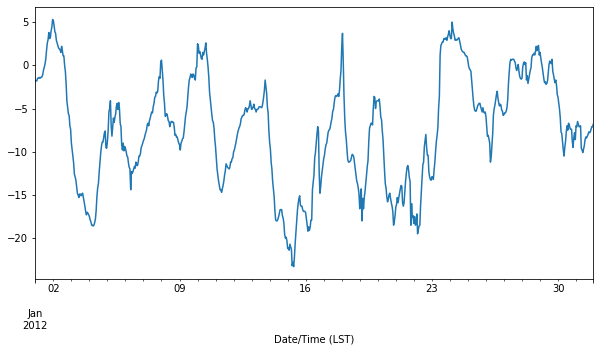

In [111]:
weather_2012["Temp (°C)"].plot(figsize=(10, 5))

In [112]:
print("Min: ", weather_2012["Temp (°C)"].min(), "°C on ",\
      weather_2012["Temp (°C)"].idxmin())
print("Max: ", weather_2012["Temp (°C)"].max(), "°C on ",\
      weather_2012["Temp (°C)"].idxmax())

Min:  -23.3 °C on  2012-01-15 08:00:00
Max:  5.3 °C on  2012-01-01 23:00:00


In [113]:
def download_weather_by_month(year, month):
    url_template = 'http://climate.weather.gc.ca/climate_data/'\
    'bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month='\
                   '{month}&timeframe=1&submit=Download+Data'
    url = url_template.format(month=month, year=year)
    weather_data = pd.read_csv(url, index_col='Date/Time (LST)',\
                               parse_dates=True)
    weather_data = weather_data.dropna(axis=1, how='any').\
    drop(['Year','Month','Day','Time (LST)'], axis=1)
    
    return weather_data

In [114]:
weather_data_2012 = [download_weather_by_month(2012, i) \
                     for i in range(1, 13)]
weather_2012 = pd.concat(weather_data_2012)

In [115]:
weather_2012.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,,,,,
2012-01-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-3.3,88,7,4.8,101.23,Fog


In [116]:
snow = weather_2012[weather_2012['Weather'] == 'Snow']
snow1 = snow[['Temp (°C)']].copy()
snow1.head()

,Temp (°C)
Date/Time (LST),
2012-01-03 07:00:00,-14.0
2012-01-04 12:00:00,-13.7
2012-01-04 14:00:00,-11.3
2012-01-04 15:00:00,-10.2
2012-01-04 16:00:00,-9.4


In [117]:
print(snow1.min())
print(snow1.idxmin())

Temp (°C)   -16.7
dtype: float64
Temp (°C)   2012-02-12 06:00:00
dtype: datetime64[ns]


### Bonus: Python script to generate random data for the population analysis

In [ ]:
# generate random integer values
from datetime import date, datetime, timedelta
from dateutil.relativedelta import *
from random import seed
from random import randint
import pandas as pd
# seed random number generator
seed(1)
# generate some integers
nfiles = 1000 #no of files to be generated
for i in range(nfiles):
    Tenants = []
    Inspection = []
    Compliance = []
    Audit = []
    Social = []
    Maintenance = []

    start_date = date(2018, 1, 1)
    sv = str(start_date.strftime('%d-%m-%Y'))
    for _ in range(36):
        value1 = randint(60, 200) #tenants
        value2 = randint(40, 55) #working
        value3 = randint(16, 25) #seniors
        value4 = randint(10, 15) #children
        value5 = randint(5, 14) #General
        value6 = randint(2, 6) #Authority
        value7 = randint(1, 9) #Leave
        value8 = randint(0, 5) #Incompliances
        value9 = randint(0, 2) #SafteyIncidents
        value10 = randint(0, 1) #Injuries
        value11 = randint(0, 1) #Fires
        value12 = randint(0, 1) #LiquidSpills
        value13 = randint(0, 1) #Evacuations
        value14 = randint(0, 2) #Policy
        value15 = randint(2, 4) #Process
        value16 = randint(1, 3) #Recall
        value17 = randint(0, 3) #Events
        value18 = randint(1, 5) #Gatherings
        value19 = randint(5, 15) #Schduled
        value20 = randint(8, 22) #Unschduled
        Tenants.append(f"{sv}	{value1}	{value2}	{value3}	{value4}")
        Inspection.append(f"{sv}	{value5}	{value6}	{value7}")
        Compliance.append(f"{sv}	{value8}	{value9}	{value10}	{value11}	{value12}	{value13}")
        Audit.append(f"{sv}	{value14}	{value15}	{value16}")
        Social.append(f"{sv}	{value17}	{value18}")
        Maintenance.append(f"{sv}	{value19}	{value20}")
        start_date = start_date + relativedelta(months=+1)
        sv = str(start_date.strftime('%d-%m-%Y'))

    dfTenants = pd.DataFrame([x.split('\t') for x in Tenants], columns=['Date','Tenants','Working','Seniors','Children'])
    dfInspection = pd.DataFrame([x.split('\t') for x in Inspection], columns=['Date','General','Authority','Leave'])
    dfCompliance = pd.DataFrame([x.split('\t') for x in Compliance], columns=['Date','Incompliances','SafteyIncidents','Injuries','Fires','LiquidSpills','Evacuations'])
    dfAudit = pd.DataFrame([x.split('\t') for x in Audit], columns=['Date','Policy','Process','Recall'])
    dfSocial = pd.DataFrame([x.split('\t') for x in Social], columns=['Date','Events','Gatherings'])
    dfMaintenance = pd.DataFrame([x.split('\t') for x in Maintenance], columns=['Date','Schduled','Unschduled'])
    nl = ['A','B','C','D']
    sheets = {'Tenants':dfTenants,'Inspection':dfInspection,'Compliance':dfCompliance,'Audit':dfAudit,'Social':dfSocial,'Maintenance':dfMaintenance}
    fileName = f'{nl[randint(0, 3)]}{nl[randint(0, 3)]}{randint(0, 3)}-{randint(1, 6)}{i}.xlsx'
    with pd.ExcelWriter(fileName) as writer:
        for sht in sheets:
            #sheets[sht].reset_index(inplace=True)
            #sheets[sht].drop(['index'], axis=1)
            sheets[sht].to_excel(writer, sheet_name=sht, index=False)
            writer.save() 
